# Comparing General and Medical LLM similarity to physician responses
### Do general and medical LLMs differ in their similarity to physician responses, and is there a significant difference in their similarity scores?
We will be conducting a T-Test below in order to assess this.

In [1]:
import pandas as pd
import numpy as np  
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../medical_expert_data_with_all_similarity.csv')
data.head()

,qtype,Question,Answer,MedLLM Answer,General LLM Response,Expert/MedLLM Response Similarity,Expert/General LLM Response Similarity,Expert/MedLLM Response Similarity (BERT),Expert/General LLM Response Similarity (BERT)
0,symptoms,What are the symptoms of Lymphocytic Choriomen...,LCMV is most commonly recognized as causing ne...,Lymphocytic choriomeningitis (LCM) is a viral ...,Lymphocytic Choriomeningitis (LCM) can cause a...,8.5,8.5,7.72,7.40
1,symptoms,What are the symptoms of Alkhurma Hemorrhagic ...,"Based on limited information, after an incubat...",Alkhurma Hemorrhagic Fever (AHF) is a rare but...,Alkhurma Hemorrhagic Fever (AHF) is a viral di...,7.5,8.0,5.47,4.21
2,symptoms,what are the signs and symptoms of rabies?,The first symptoms of rabies may be very simil...,Rabies is a viral disease that affects the cen...,Early symptoms of rabies can be similar to the...,9.0,9.0,7.84,8.40
3,symptoms,what are the symptoms of botulism?,The classic symptoms of botulism include doubl...,Botulism is a rare but serious illness caused ...,1. Difficulty swallowing or speaking\n2. Dry m...,9.0,9.0,8.57,4.97
4,symptoms,What are the symptoms of Marburg hemorrhagic f...,"After an incubation period of 5-10 days, sympt...",Marburg hemorrhagic fever (Marburg HF) is a se...,Marburg hemorrhagic fever (Marburg HF) is a se...,9.5,9.5,8.20,7.97


In [4]:
stats.ttest_ind(a=data['Expert/General LLM Response Similarity'], b=data['Expert/MedLLM Response Similarity'], equal_var=True)

TtestResult(statistic=-0.2601421720380572, pvalue=0.7950271858007587, df=196.0)

In [5]:
stats.ttest_ind(a=data['Expert/General LLM Response Similarity (BERT)'], b=data['Expert/MedLLM Response Similarity (BERT)'], equal_var=True)

TtestResult(statistic=-1.5675319501103337, pvalue=0.11860343695892343, df=196.0)

### Distribution of similarity scores

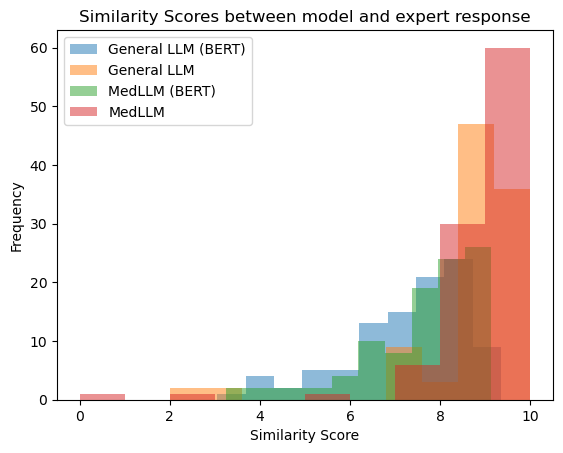

In [9]:
plt.hist(data['Expert/General LLM Response Similarity (BERT)'],  
         alpha=0.5,
         label='General LLM (BERT)') 
  
plt.hist(data['Expert/General LLM Response Similarity'],  
         alpha=0.5,
         label='General LLM') 

plt.hist(data['Expert/MedLLM Response Similarity (BERT)'],  
         alpha=0.5,
         label='MedLLM (BERT)') 

plt.hist(data['Expert/MedLLM Response Similarity'],  
         alpha=0.5,
         label='MedLLM') 
  
plt.legend(loc='upper left') 
plt.title('Similarity Scores between model and expert response') 
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.show()